In [1]:
!pip install yfinance
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt

In [3]:
tickers = ['GOOG','SONY']
test = data.DataReader(tickers, start='2017-01-01', end='2020-09-28')

[*********************100%***********************]  2 of 2 completed


In [4]:
test.head()

Adj Close                 Close                  High             \
                 GOOG       SONY       GOOG       SONY       GOOG       SONY   
Date                                                                           
2017-01-03  39.306999  28.290001  39.306999  28.290001  39.481499  28.320000   
2017-01-04  39.345001  28.580000  39.345001  28.580000  39.567001  28.660000   
2017-01-05  39.701000  28.719999  39.701000  28.719999  39.723999  28.790001   
2017-01-06  40.307499  28.959999  40.307499  28.959999  40.395000  29.040001   
2017-01-09  40.332500  28.820000  40.332500  28.820000  40.498299  28.950001   

                  Low                  Open               Volume           
                 GOOG       SONY       GOOG       SONY      GOOG     SONY  
Date                                                                       
2017-01-03  38.790001  28.040001  38.940498  28.100000  33146000   894900  
2017-01-04  39.158001  28.420000  39.417999  28.480000  21460000   910500  
2017-01-05  39.250999  28.430000  39.304001  28.540001  26704000  1027500  
2017-01-06  39.610199  28.530001  39.763000  28.570000  32804000   964800  
2017-01-09  40.141499  28.740000  40.320000  28.740000  25492000   648700

In [5]:
test = test['Adj Close']
test.head()

,GOOG,SONY
Date,,
2017-01-03,39.306999,28.290001
2017-01-04,39.345001,28.580000
2017-01-05,39.701000,28.719999
2017-01-06,40.307499,28.959999
2017-01-09,40.332500,28.820000


In [6]:
google = test['GOOG'].pct_change().apply(lambda x: np.log(1+x))
google.head()

Date
2017-01-03         NaN
2017-01-04    0.000966
2017-01-05    0.009007
2017-01-06    0.015161
2017-01-09    0.000620
Name: GOOG, dtype: float64

In [7]:
sony = test['SONY'].pct_change().apply(lambda x: np.log(1+x))
sony.head()

Date
2017-01-03         NaN
2017-01-04    0.010199
2017-01-05    0.004887
2017-01-06    0.008322
2017-01-09   -0.004846
Name: SONY, dtype: float64

In [8]:
var_google = google.var()
var_google

0.0003075601990449613

In [9]:
var_sony = sony.var()
var_sony

0.00033159226150551485

In [10]:
google_vol = np.sqrt(var_google * 250)
sony_vol = np.sqrt(var_sony * 250)
google_vol, sony_vol

(0.2772905511575184, 0.28792024134537453)

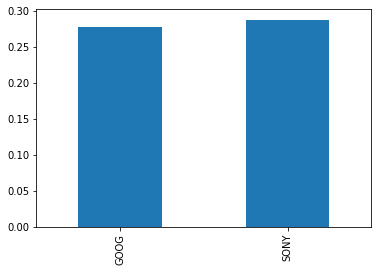

In [11]:
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [12]:
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

,GOOG,SONY
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.000966,0.010199
2017-01-05,0.009007,0.004887
2017-01-06,0.015161,0.008322
2017-01-09,0.000620,-0.004846


In [13]:
test1['GOOG'].cov(test1['SONY'])

0.00016745449045625895

In [14]:
test1['GOOG'].corr(test1['SONY'])

0.524359979804926

In [15]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

,GOOG,SONY
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.000966,0.010199
2017-01-05,0.009007,0.004887
2017-01-06,0.015161,0.008322
2017-01-09,0.000620,-0.004846


In [16]:
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

GOOG    0.000648
SONY    0.001070
dtype: float64

In [17]:
e_r = (e_r_ind*w).sum()
e_r

0.0009855961510389264

In [18]:
cov_matrix = test.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,GOOG,SONY
GOOG,0.000308,0.000167
SONY,0.000167,0.000332


In [19]:
corr_matrix = test.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,GOOG,SONY
GOOG,1.00000,0.52436
SONY,0.52436,1.00000


In [20]:
w = {'GOOG': 0.3, 'SONY': 0.7}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0002604915120433774

In [21]:
ann_sd = test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

GOOG    0.277291
SONY    0.287920
dtype: float64

In [22]:
assets = pd.concat([e_r_ind, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
GOOG,0.000648,0.277291
SONY,0.001070,0.287920


In [23]:
p_ret = [] 
p_vol = [] 
p_weights = [] 

num_assets = len(test.columns)
num_portfolios = 10000

In [24]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r_ind) 

    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var) 
    ann_sd = sd*np.sqrt(250) 
    p_vol.append(ann_sd)

In [25]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(test.columns.tolist()) :
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [26]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,GOOG weight,SONY weight
0,0.000820,0.246943,0.593365,0.406635
1,0.000914,0.250876,0.370250,0.629750
2,0.000846,0.246504,0.532080,0.467920
3,0.000770,0.251032,0.711759,0.288241
4,0.000780,0.249869,0.687866,0.312134


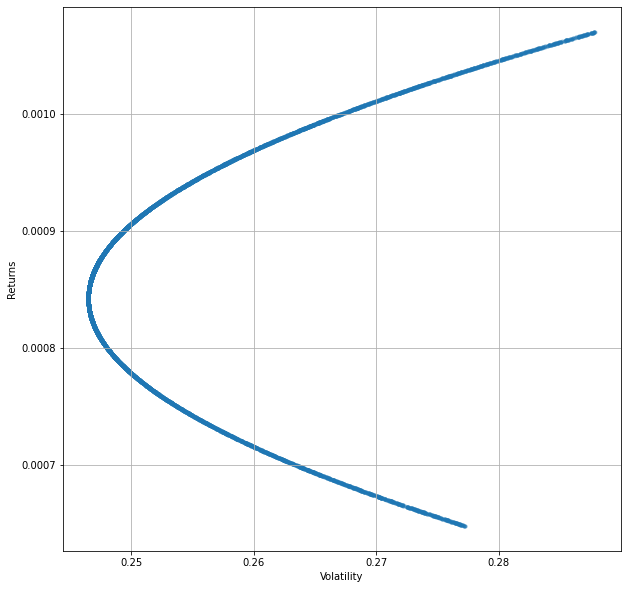

In [27]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [28]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]                              
min_vol_port

Returns        0.000842
Volatility     0.246496
GOOG weight    0.539529
SONY weight    0.460471
Name: 5454, dtype: float64

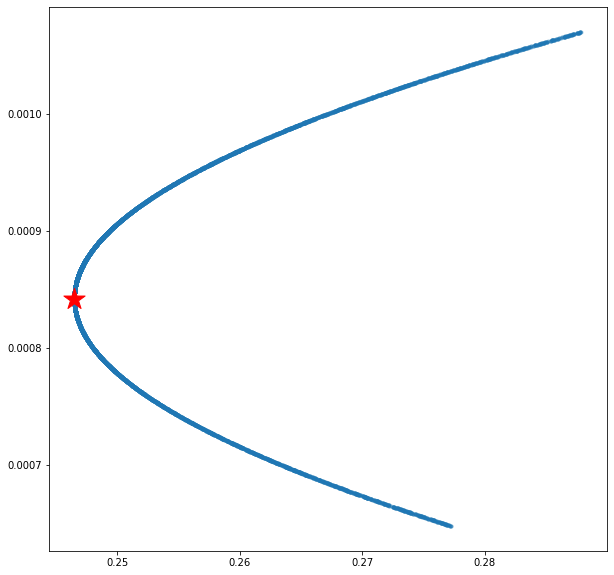

In [29]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

#The red star denotes the most efficient portfolio with minimum volatility.

In [30]:
rf = 0.01 
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.001070
Volatility     0.287905
GOOG weight    0.000104
SONY weight    0.999896
Name: 3693, dtype: float64

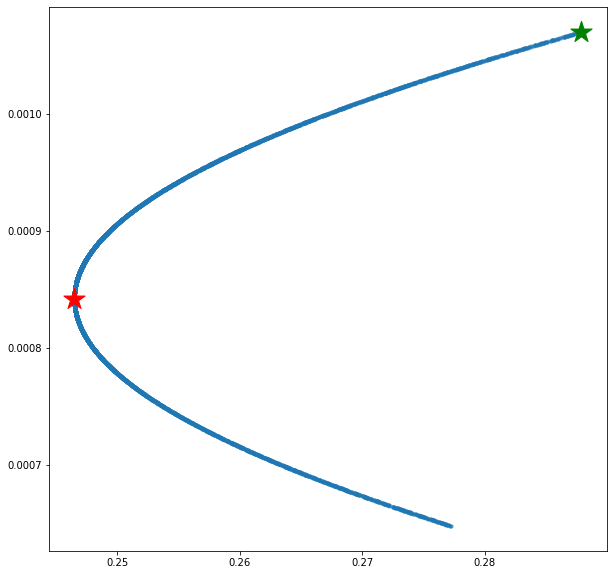

In [31]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

#The green star represents the optimal risky portfolio.